In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# EDA

In [2]:
data=pd.read_csv("Greenhouse Plant Growth Metrics.csv")
data.head(5)

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [4]:
data=data.drop(["Random"],axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACHP    30000 non-null  float64
 1   PHR     30000 non-null  float64
 2   AWWGV   30000 non-null  float64
 3   ALAP    30000 non-null  float64
 4   ANPL    30000 non-null  float64
 5   ARD     30000 non-null  float64
 6   ADWR    30000 non-null  float64
 7   PDMVG   30000 non-null  float64
 8   ARL     30000 non-null  float64
 9   AWWR    30000 non-null  float64
 10  ADWV    30000 non-null  float64
 11  PDMRG   30000 non-null  float64
 12  Class   30000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 3.0+ MB


In [6]:
data.describe()

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [7]:
data.isnull().sum()

ACHP     0
PHR      0
AWWGV    0
ALAP     0
ANPL     0
ARD      0
ADWR     0
PDMVG    0
ARL      0
AWWR     0
ADWV     0
PDMRG    0
Class    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["Class"].value_counts()

Class
SA    5000
SB    5000
SC    5000
TA    5000
TB    5000
TC    5000
Name: count, dtype: int64

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_62319/99576922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class",data=data,palette="dark")


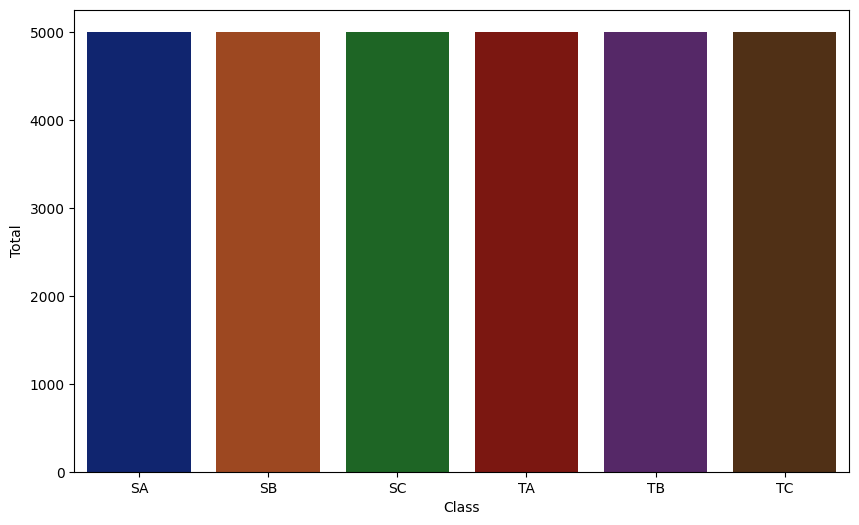

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="Class",data=data,palette="dark")
plt.ylabel("Total")
plt.show()

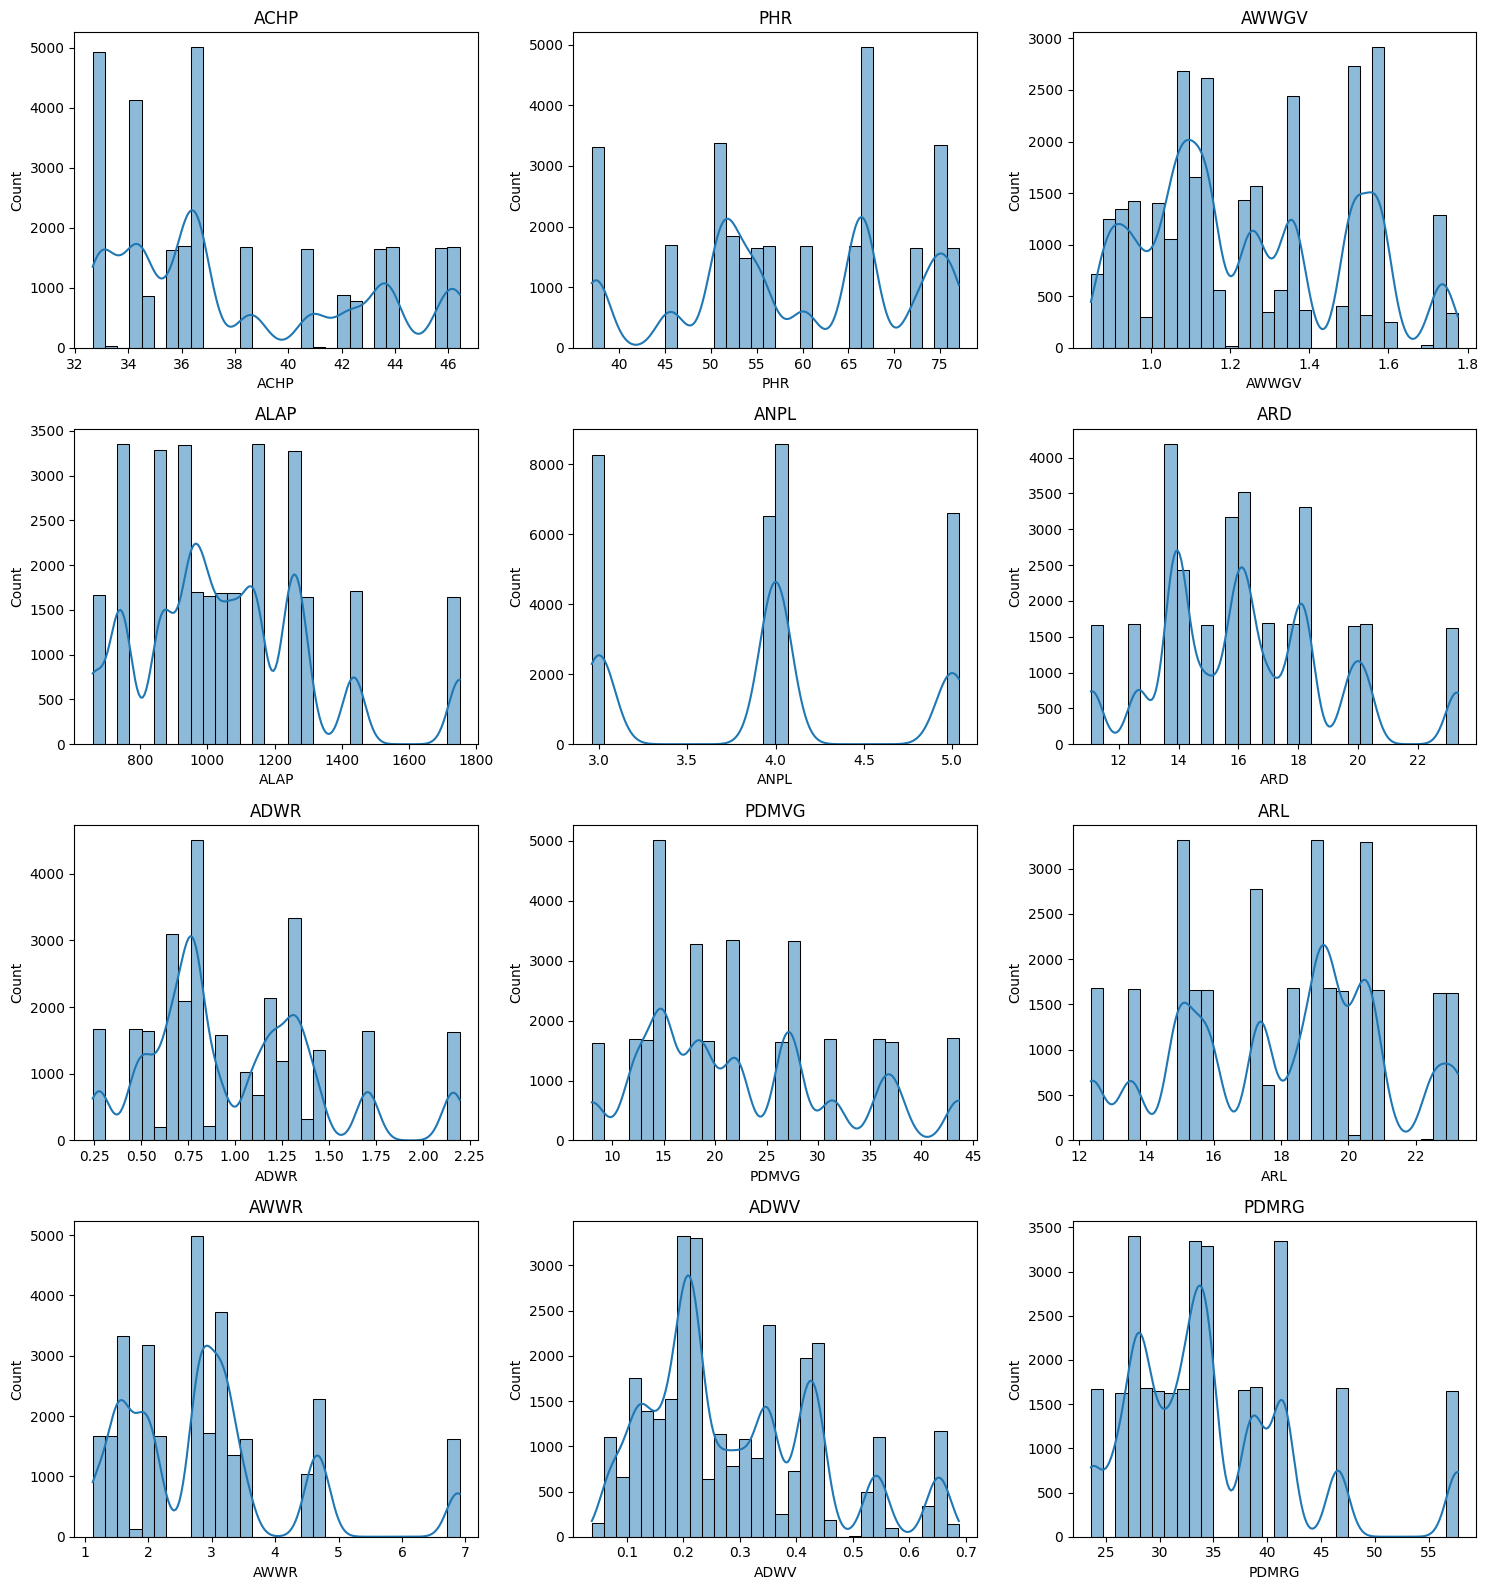

In [31]:
num_col = data.select_dtypes(include="number")
n = len(num_col.columns)
cols = 3 
rows = -(-n // cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(num_col.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [33]:
le=LabelEncoder()
data["Class"]=le.fit_transform(data["Class"])

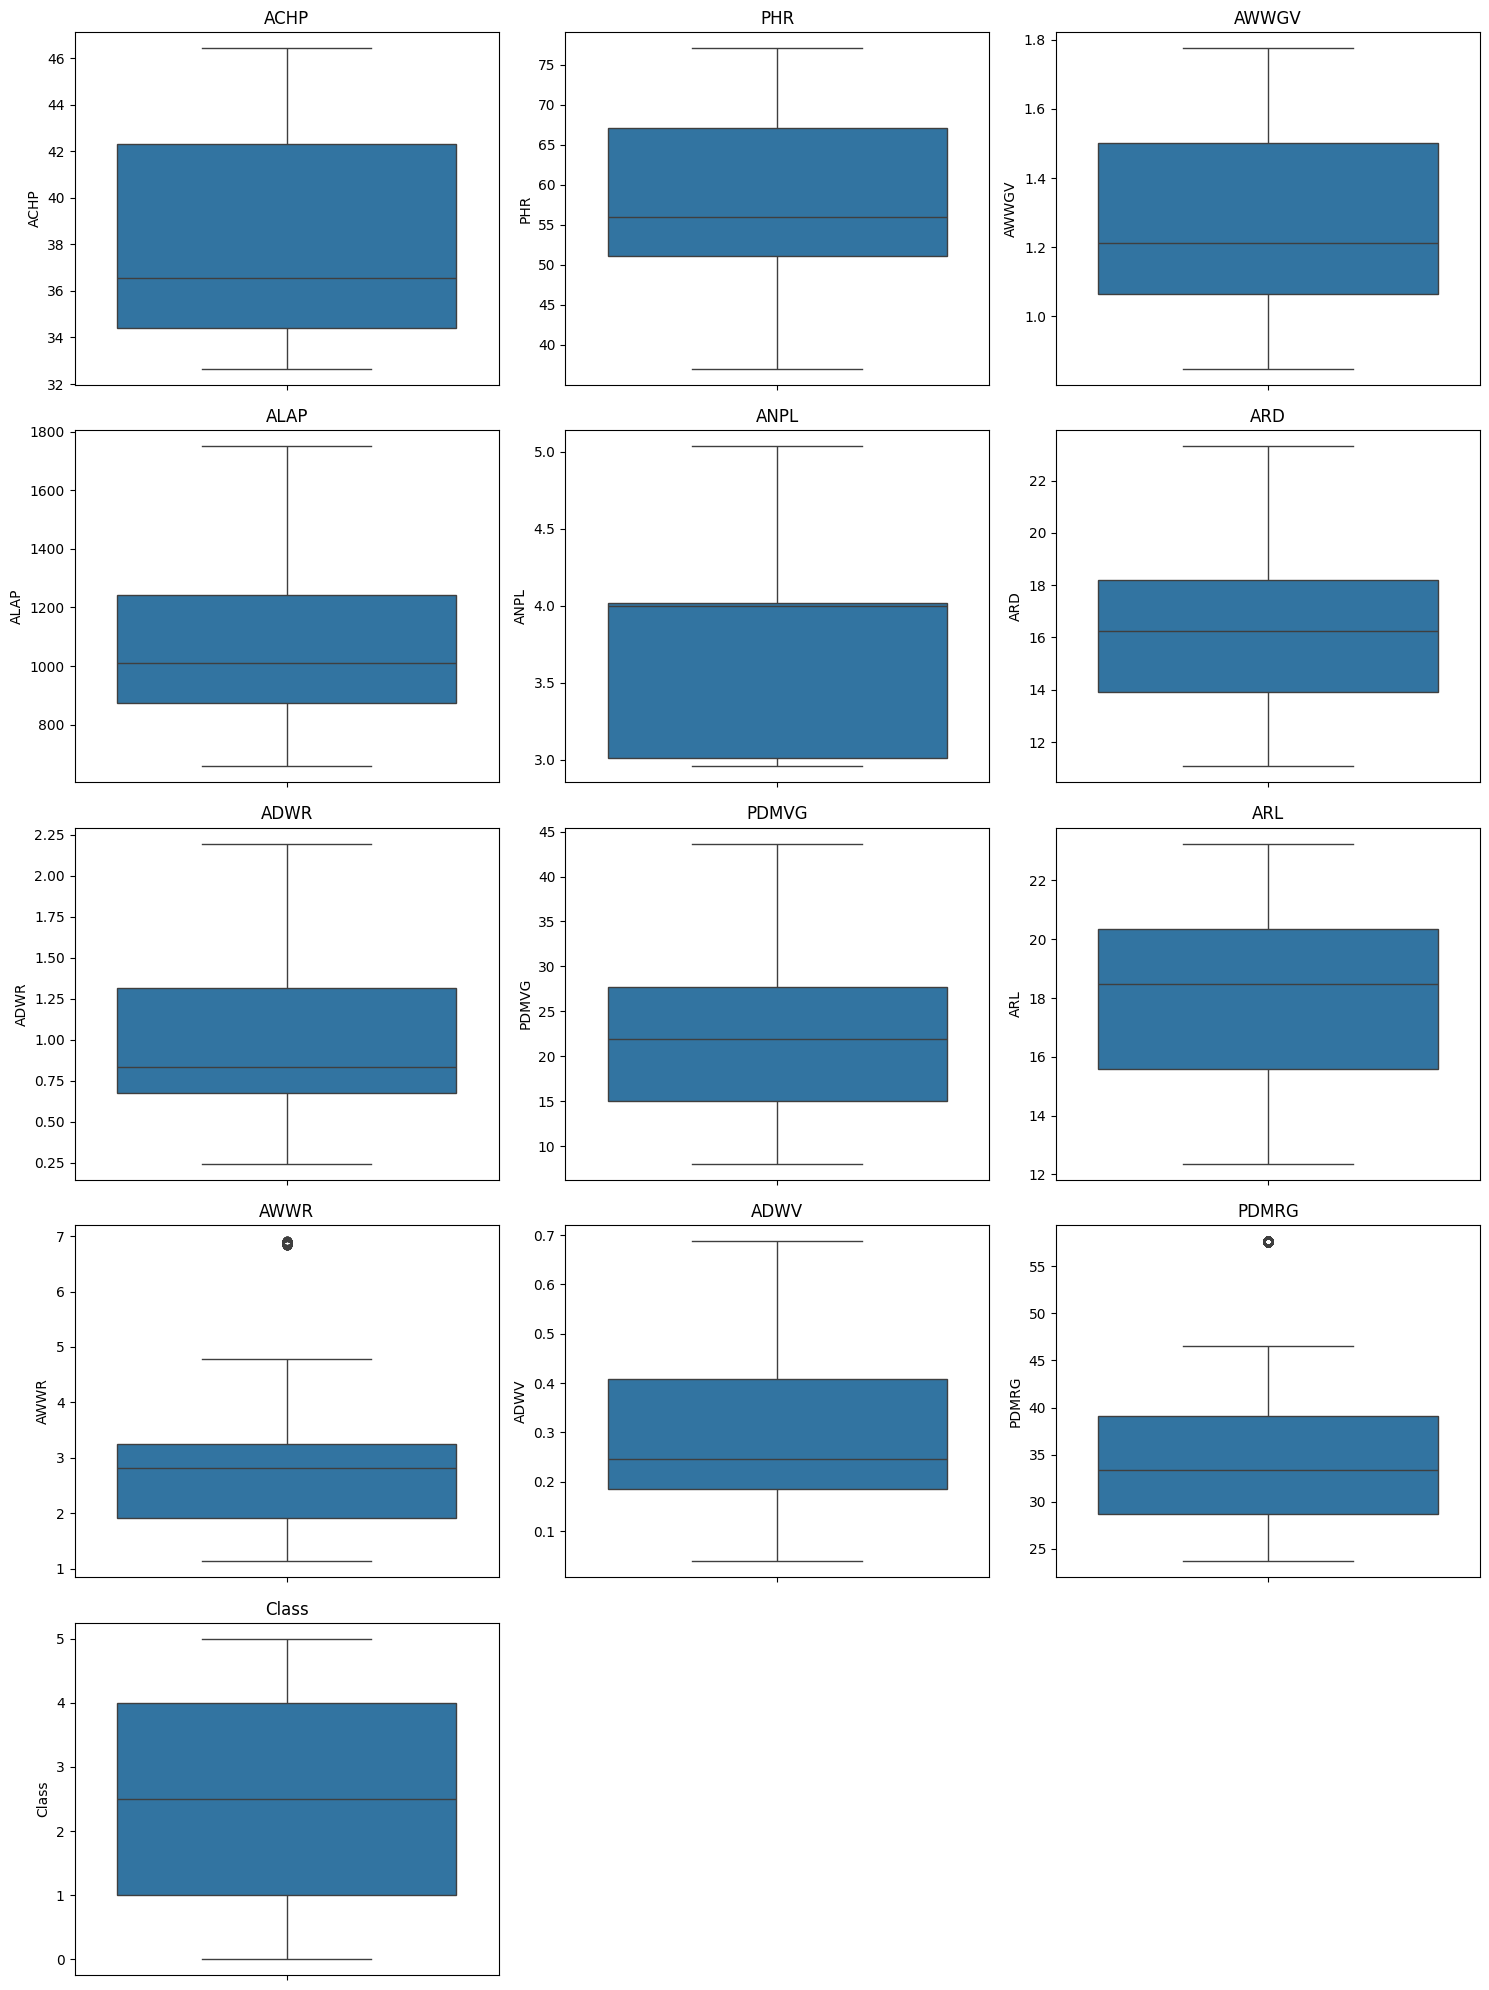

In [44]:
num_col = data.select_dtypes(include="number")
n = len(num_col.columns)
cols = 3 
rows = -(-n // cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(num_col.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Statistics of Dataset

In [55]:
for col in num_col.columns:
    print(f"Skewness for {col}:{skew(data[col])}")
    print(f"Kurtosis for {col}:{kurtosis(data[col])}")
    print("-"*50)

Skewness for ACHP:0.594971646965852
Kurtosis for ACHP:-1.050313362358472
--------------------------------------------------
Skewness for PHR:-0.20087067892589058
Kurtosis for PHR:-0.9712287212605899
--------------------------------------------------
Skewness for AWWGV:0.3372974580704199
Kurtosis for AWWGV:-1.009557689214864
--------------------------------------------------
Skewness for ALAP:0.7684650758919386
Kurtosis for ALAP:0.5697995113238603
--------------------------------------------------
Skewness for ANPL:0.07683770816173868
Kurtosis for ANPL:-0.9737562044540362
--------------------------------------------------
Skewness for ARD:0.5011129786169739
Kurtosis for ARD:0.04467913737421414
--------------------------------------------------
Skewness for ADWR:0.7480989973945041
Kurtosis for ADWR:0.23171088910264226
--------------------------------------------------
Skewness for PDMVG:0.5843275265241695
Kurtosis for PDMVG:-0.5764413253717864
--------------------------------------------

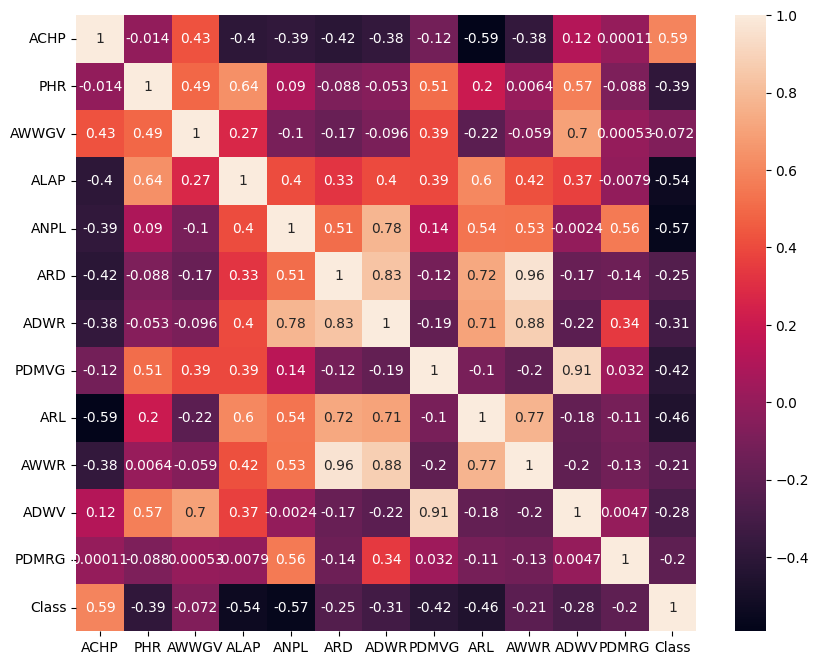

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Elbow Method

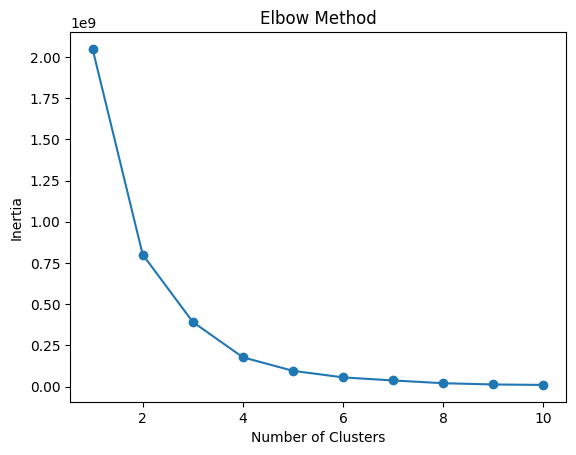

In [68]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [71]:
kmeans=KMeans(n_clusters=4,random_state=42)
data["Cluster"]=kmeans.fit_predict(data)
print(data.head())

        ACHP        PHR     AWWGV         ALAP      ANPL        ARD      ADWR  \
0  34.533468  54.566983  1.147449  1284.229549  4.999713  16.274918  1.706810   
1  34.489028  54.567692  1.149530  1284.247744  5.024259  16.269452  1.700930   
2  33.100405  67.067344  1.104647  1009.208996  5.007652  15.980760  1.185391   
3  34.498319  54.559049  1.137759  1284.227623  4.991501  16.276710  1.716396   
4  36.297008  45.588894  1.363205   981.470310  4.003682  16.979894  0.777428   

       PDMVG        ARL      AWWR      ADWV      PDMRG  Class  Cluster  
0  18.399982  19.739037  2.949240  0.209251  57.633906      0        0  
1  18.398289  19.758836  2.943137  0.216154  57.633697      0        0  
2  19.398789  20.840822  2.861635  0.200113  41.289875      0        3  
3  18.413613  19.736098  2.946784  0.223092  57.645661      0        0  
4  31.423772  17.331894  2.766242  0.424172  27.898619      0        3  


In [74]:
print("Cluster Centers :\n",kmeans.cluster_centers_)

Cluster Centers :
 [[3.46680308e+01 6.78007730e+01 1.26009926e+00 1.30577483e+03
  4.49382832e+00 1.74223290e+01 1.32241688e+00 2.67500744e+01
  2.09392745e+01 3.62586518e+00 3.33041814e-01 3.78435638e+01
  9.97132508e-01 6.66133815e-16]
 [4.05470578e+01 4.97826688e+01 1.13443742e+00 7.74622023e+02
  3.40303923e+00 1.57995426e+01 7.85461811e-01 1.59667589e+01
  1.63829856e+01 2.44584554e+00 1.89882347e-01 3.27903847e+01
  3.79648574e+00 1.00000000e+00]
 [3.65997283e+01 7.70099624e+01 1.50597081e+00 1.75100209e+03
  3.99991126e+00 1.97300299e+01 1.42401197e+00 2.70911761e+01
  2.25497760e+01 4.73990811e+00 4.07854057e-01 3.00420580e+01
  1.00000000e+00 2.00000000e+00]
 [3.83754379e+01 5.81966319e+01 1.27902301e+00 1.03867164e+03
  4.00237371e+00 1.56028960e+01 9.23785533e-01 2.42736355e+01
  1.71502813e+01 2.61262307e+00 3.20958972e-01 3.53986809e+01
  2.62341631e+00 3.00000000e+00]]


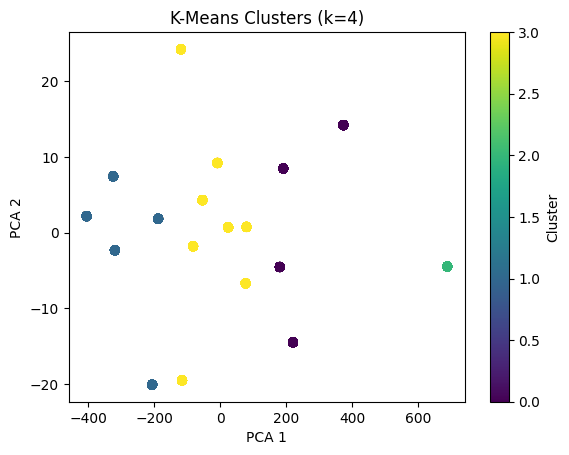

In [78]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

plt.scatter(reduced[:, 0], reduced[:, 1], c=data['Cluster'], cmap='viridis')
plt.title("K-Means Clusters (k=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


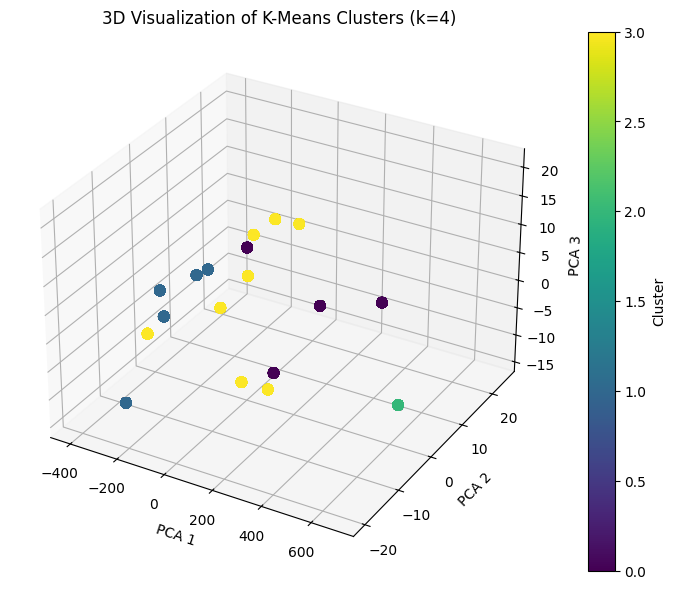

In [82]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(data)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2],
                c=data['Cluster'], cmap='viridis', s=50)

ax.set_title("3D Visualization of K-Means Clusters (k=4)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(sc, label="Cluster")
plt.show()